In [1]:
import easyocr
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import re

In [2]:
reader = easyocr.Reader(['en'])  # с ru хуже

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [30]:
image_file = "wagon5.png"
img = mpimg.imread(image_file)
result = reader.readtext(image_file, canvas_size=300, min_size=300)
print(result)

[([[46, 26], [379, 26], [379, 116], [46, 116]], '[9024 |6935', 0.12760629943024954)]


[46, 26] [379, 26] [379, 116] [46, 116]
[9024 |6935
116
333 90


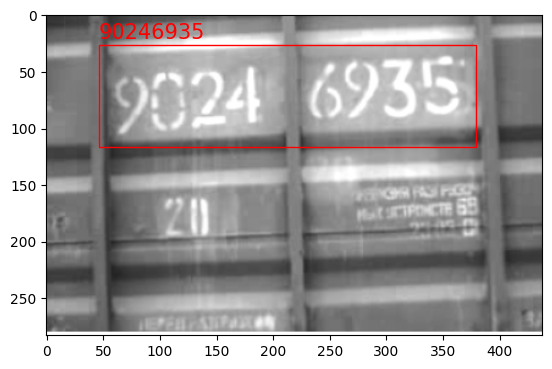

In [16]:
fig, ax = plt.subplots(1)

for element in result:
    print(*element[0])
    print(element[1])
    print(element[0][2][1])
    width = element[0][1][0] - element[0][0][0]
    height = element[0][2][1] - element[0][0][1]
    print(width, height)
    rect = patches.Rectangle(element[0][0], width, height,
                             linewidth=1, edgecolor='r', facecolor="none")
    ax.add_patch(rect)
    ax.text(element[0][0][0], element[0][0][1] - 5,
            re.sub("[^0-9]", "", element[1].replace(" ", "")),
            fontsize=15, color='r')

ax.imshow(img)